# Final Project: Fully Connected Neural Network

# Importing Python Libraries

In [17]:
%matplotlib inline 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Model 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation,Input


# Load dataset

In [4]:
dataset = pd.read_csv("AAPL.csv")
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2023,126.889999,128.660004,125.080002,126.360001,125.657639,89113600
1,1/5/2023,127.129997,127.769997,124.760002,125.019997,124.325081,80962700
2,1/6/2023,126.010002,130.289993,124.889999,129.619995,128.899521,87754700
3,1/9/2023,130.470001,133.410004,129.889999,130.149994,129.426575,70790800
4,1/10/2023,130.259995,131.259995,128.119995,130.729996,130.003342,63896200
...,...,...,...,...,...,...,...
233,12/7/2023,193.630005,195.000000,193.589996,194.270004,194.270004,47477700
234,12/8/2023,194.199997,195.990005,193.669998,195.710007,195.710007,53377300
235,12/11/2023,193.110001,193.490005,191.419998,193.179993,193.179993,60943700
236,12/12/2023,193.080002,194.720001,191.720001,194.710007,194.710007,52696900


# Train, Validation and Test Sets Split

In [8]:
# Extracting the features and labels from the dataset 
X = np.asarray(dataset[['Open', 'High', 'Low', 'Volume']])
Y = np.asarray(dataset['Close'])

# First we will shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, we split our data into train/val/test sets
train_split = int(0.5*Y.size)
val_split = int(0.75*Y.size)

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

print("X_train.shape = ",X_train.shape)
print("Y_train.shape = ",Y_train.shape)

X_train.shape =  (119, 4)
Y_train.shape =  (119,)


# Data Normalization

In [9]:
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


# Fully Connected Neural Network

In [26]:

def my_FullyConnectedModel(k=3, lr=0.15):

    model = Sequential([
        Dense(128, activation='relu', input_shape=(4,)),  # 4 input features: 'Open', 'High', 'Low', 'Volume'
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer: predicting 'Close' value
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [27]:
model = my_FullyConnectedModel()
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               640       
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11009 (43.00 KB)
Trainable params: 11009 (43.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [28]:
my_batch_size = 50
my_epochs = 20

history = model.fit(X_train, Y_train, validation_data=(X_val,Y_val),
                    batch_size=my_batch_size, epochs=my_epochs,verbose=1)

Epoch 1/20
3/3 [==============================] - 1s 68ms/step - loss: 29721.3945 - val_loss: 29842.9102
Epoch 2/20
3/3 [==============================] - 0s 16ms/step - loss: 29652.3867 - val_loss: 29779.1055
Epoch 3/20
3/3 [==============================] - 0s 20ms/step - loss: 29586.6445 - val_loss: 29712.5508
Epoch 4/20
3/3 [==============================] - 0s 19ms/step - loss: 29518.3398 - val_loss: 29641.7715
Epoch 5/20
3/3 [==============================] - 0s 26ms/step - loss: 29446.1562 - val_loss: 29557.1523
Epoch 6/20
3/3 [==============================] - 0s 18ms/step - loss: 29356.5664 - val_loss: 29456.9199
Epoch 7/20
3/3 [==============================] - 0s 23ms/step - loss: 29251.1055 - val_loss: 29338.0469
Epoch 8/20
3/3 [==============================] - 0s 20ms/step - loss: 29126.3906 - val_loss: 29197.8027
Epoch 9/20
3/3 [==============================] - 0s 19ms/step - loss: 28979.6055 - val_loss: 29029.4688
Epoch 10/20
3/3 [==============================] - 0s 1

In [30]:
test_accuracy = model.evaluate(X_test,Y_test)
print(test_accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 22701.8418
22701.841796875


In [31]:
predictedStockPrice = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


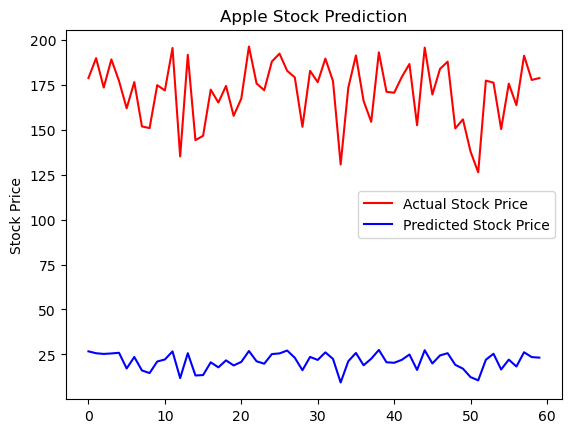

In [33]:
plt.plot(Y_test, color = 'red', label = "Actual Stock Price")
plt.plot(predictedStockPrice, color = 'blue', label = "Predicted Stock Price")
plt.title("Apple Stock Prediction")
plt.ylabel('Stock Price')
plt.legend()